In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
print(last_date)

('2017-08-23',)


In [135]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [136]:
# Perform a query to retrieve the data and precipitation scores

query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [137]:
# Save the query results as a Pandas DataFrame and set the index to the date column

rain_df = pd.DataFrame(query)
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [138]:
rain_df = rain_df.fillna(0)

In [139]:
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


In [140]:
rain_df_date = rain_df.set_index('date')
rain_df_date

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [141]:
# Sort the dataframe by date
rain_df_date = rain_df_date.sort_index(ascending=True)

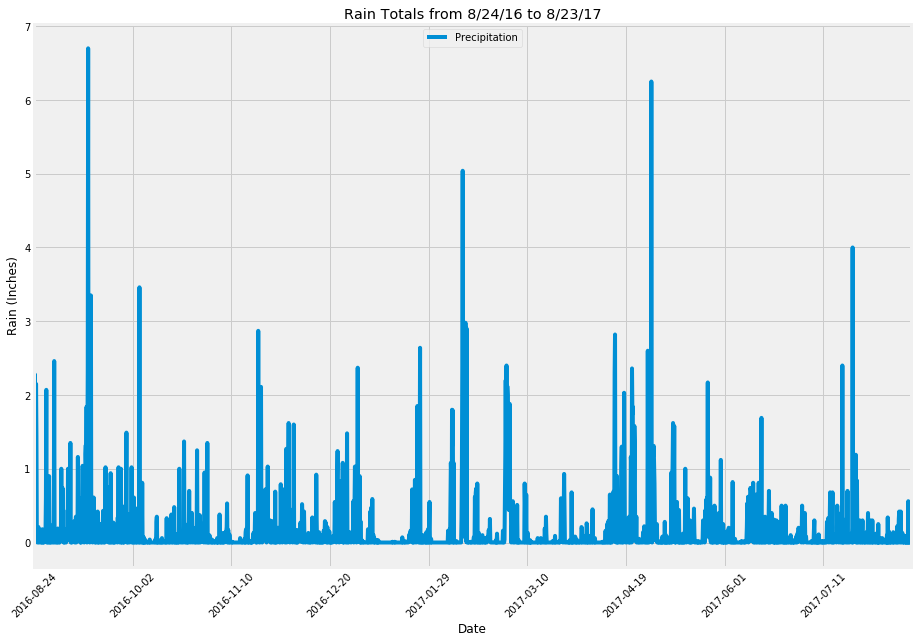

In [144]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_df_date.plot(figsize=(14,10))
plt.xlabel("Date")
plt.ylabel("Rain (Inches)")
plt.title("Rain Totals from 8/24/16 to 8/23/17")
plt.legend(["Precipitation"], loc="upper center")
plt.xticks(rotation=45)
plt.show()


In [143]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df_date.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [145]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station).count()

In [146]:
print(num_stations)

9


In [160]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all())

In [149]:
print(stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [152]:
active_station = stations[0][0]
print(active_station)

USC00519281


In [154]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()

In [155]:
print(active_temp)

[(54.0, 85.0, 71.66378066378067)]


In [162]:
# Choose the station with the highest number of temperature observations.

max_temp_station = session.query(Measurement.station, 
                    func.count(Measurement.tobs)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).first()

In [158]:
max_temp_station= max_temp_station[0]

In [159]:
print(max_temp_station)

USC00519281


In [164]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > last_year)
                   .filter(Measurement.station == active_station)
                   .order_by(Measurement.date)
                   .all())

In [165]:
print(temp)

[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

In [171]:
temp_df = pd.DataFrame(temp)
temp_df = temp_df.set_index('date')

In [172]:
temp_df.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


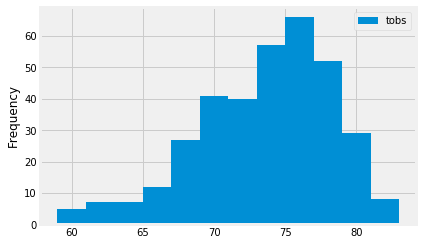

In [173]:
temp_df.plot(kind='hist', bins=12)

In [199]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [214]:
trip_start = dt.date(2019, 12, 20)
trip_end = dt.date(2019, 12, 27)
last_year = dt.timedelta(days=1095)
my_trip = (calc_temps((trip_start-last_year), (trip_end-last_year)))

In [215]:
print(my_trip)

[(68.0, 73.01960784313725, 78.0)]
